In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time
#from lwautils import lwa_arx 
import pandas as pd
from cr_data_inspection_functions import *
import struct
import math
from lwa_antpos import mapping
import os

In [40]:
fname='/home/ubuntu/kp/data/2023April4/packetwait60001680654937.4761376.dat'
fname='/home/ubuntu/kp/data/2023April4/packetwait6000_triggersnap041680656108.0096362.dat'
fname='/home/ubuntu/kp/data/2023April5/file5events1680708308.1066167.dat' #five "events" (triggers from software) in one file
fname='/home/ubuntu/kp/data/2023April5/file5events_aftersync1680727473.3673108.dat' #trying again after redoing synchronization and setup
fname='/home/ubuntu/kp/data/2023April6/test5events1680827775.852633.dat'  #new firmware
records=parsefile(fname)

File contains  3520  packets


In [41]:
packetboardids=[record['board_id'] for record in records]
timestamps=[record['timestamp'] for record in records]

In [42]:
for i in range(11):
    count=0
    for b in packetboardids:
        if i+1==b:
            count+=1
    print('Got ',count,' packets from snap',i+1)

Got  320  packets from snap 1
Got  320  packets from snap 2
Got  320  packets from snap 3
Got  320  packets from snap 4
Got  320  packets from snap 5
Got  320  packets from snap 6
Got  320  packets from snap 7
Got  320  packets from snap 8
Got  320  packets from snap 9
Got  320  packets from snap 10
Got  320  packets from snap 11


In [43]:
64*5

320

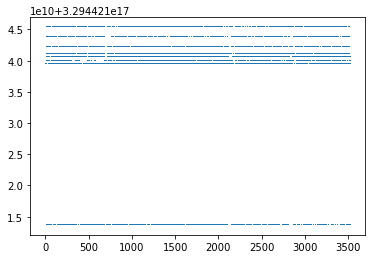

In [44]:
plt.plot(timestamps,',')
#plt.ylim(3.2942e17,3.2943e17)

In [45]:
timestamps1=[record['timestamp'] for record in records if record['board_id']==1]
timestamps2=[record['timestamp'] for record in records if record['board_id']==2]
timestamps3=[record['timestamp'] for record in records if record['board_id']==3]
timestamps4=[record['timestamp'] for record in records if record['board_id']==4]
timestamps5=[record['timestamp'] for record in records if record['board_id']==5]
timestamps6=[record['timestamp'] for record in records if record['board_id']==6]
timestamps7=[record['timestamp'] for record in records if record['board_id']==7]
timestamps8=[record['timestamp'] for record in records if record['board_id']==8]
timestamps9=[record['timestamp'] for record in records if record['board_id']==9]
timestamps10=[record['timestamp'] for record in records if record['board_id']==10]
timestamps11=[record['timestamp'] for record in records if record['board_id']==11]

329442113680834559 0
329442142134992895 0
329442140524380159 0
329442139450638335 0
329442141061251071 0
329442141061251071 0
329442145356218367 0
329442143745605631 0
329442139987509247 0
329442140524380159 0
329442139450638335 0


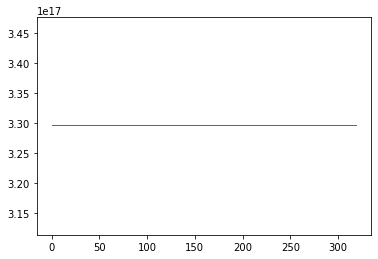

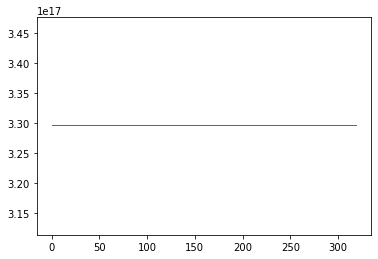

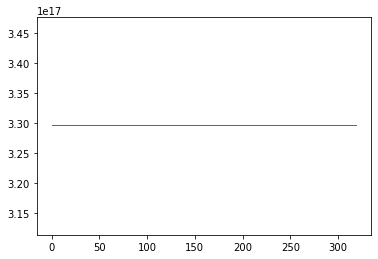

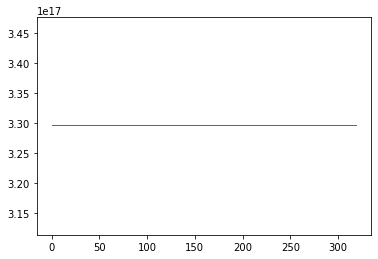

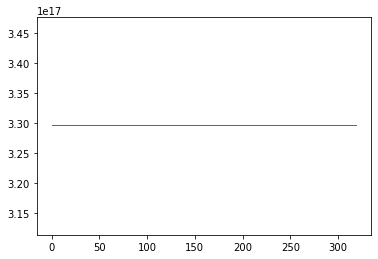

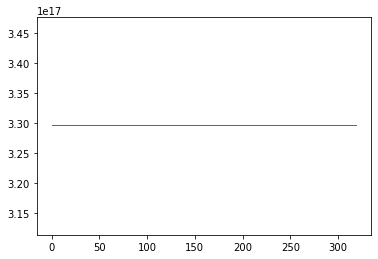

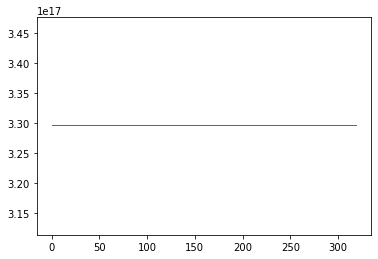

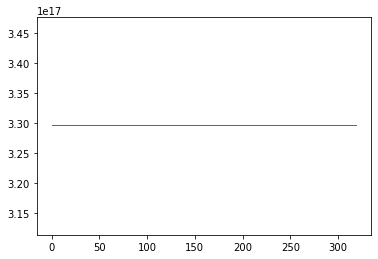

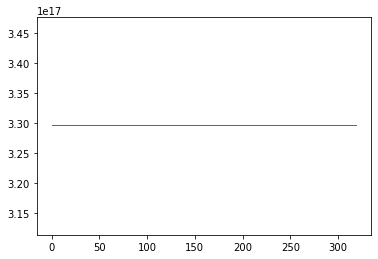

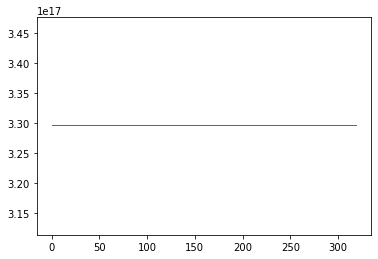

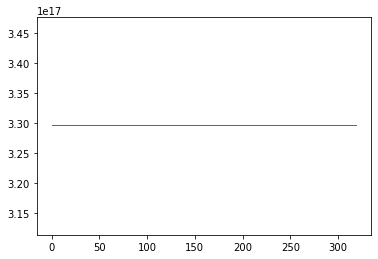

In [57]:
separatetimestampsbyboard=[timestamps1,timestamps2,timestamps3,timestamps4,timestamps5,timestamps6,timestamps7,timestamps8,timestamps9,timestamps10,timestamps11]
for singleboardtimestamps in separatetimestampsbyboard:
    print(np.max(np.asarray(singleboardtimestamps)),np.max(np.asarray(singleboardtimestamps))-np.min(np.asarray(singleboardtimestamps)))

    plt.figure()
    plt.plot(singleboardtimestamps,',')
    


In [47]:
timestamps_by_board_and_event=[]
for t in separatetimestampsbyboard:
    event1=np.asarray(t[0:64])
    event2=np.asarray(t[64:64*2])
    event3=np.asarray(t[64*2:64*3])
    event4=np.asarray(t[64*3:64*4])
    event5=np.asarray(t[64*4:64*5])
    timestamps_by_board_and_event.append([event1,event2,event3,event4,event5])
    

64


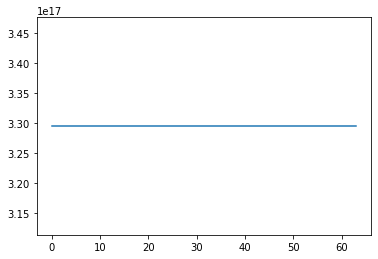

In [48]:
print(len(timestamps_by_board_and_event[0][0]))
plt.plot(timestamps_by_board_and_event[0][0])

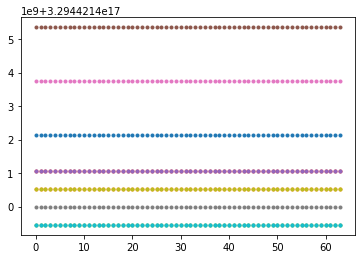

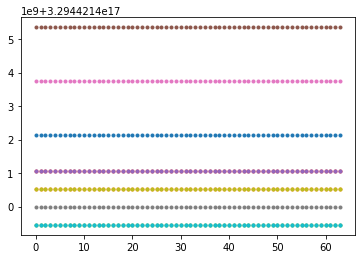

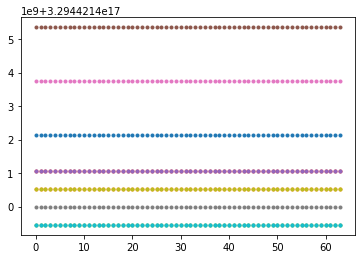

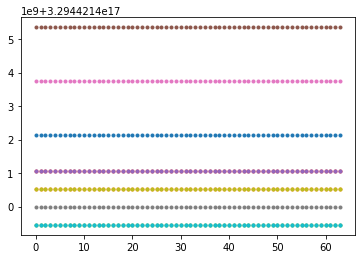

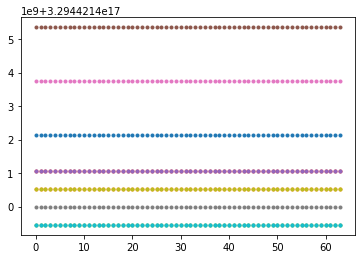

In [49]:
for e in range(5):
    plt.figure()
    for b in [1,2,3,4,5,6,7,8,9,10]:  #skip board 0 which is different from the others
        plt.plot(timestamps_by_board_and_event[b][e],'.',label=b)



In [56]:
events=[[],[],[],[],[],]
for e in range(5):
    for b in range(11):
        oneboardoneevent=timestamps_by_board_and_event[b][e]
        events[e].append(np.mean(np.asarray(oneboardoneevent)))
        #print(np.max(oneboardoneevent)-np.min(oneboardoneevent))
for e in events:
    print(np.max(np.asarray(e))-np.min(np.asarray(e)))

31675383808.0
31675383808.0
31675383808.0
31675383808.0
31675383808.0


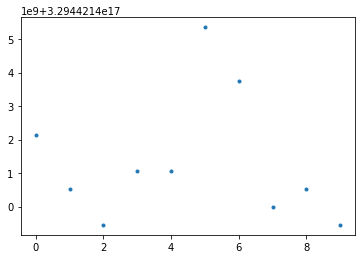

In [52]:
plt.plot(events[0][1:],'.')


In [53]:
print(events[0][0])
samplespersecond=1.96e8
unixtime=events[0][0]/(samplespersecond)
print(unixtime)

3.2944211368083456e+17
1680827110.6165028


In [58]:
print(83037896.0/samplespersecond)
print(31675383808.0/samplespersecond)

0.42366273469387755
161.6091010612245


In [62]:
records2=parsefile('/home/ubuntu/kp/data/2023April6/test1event1680828101.1639698.dat')
packetboardids2=[record['board_id'] for record in records2]
timestamps2=[record['timestamp'] for record in records2]

timestamps1a=[record['timestamp'] for record in records2 if record['board_id']==1]
timestamps2a=[record['timestamp'] for record in records2 if record['board_id']==2]
timestamps3a=[record['timestamp'] for record in records2 if record['board_id']==3]
timestamps4a=[record['timestamp'] for record in records2 if record['board_id']==4]
timestamps5a=[record['timestamp'] for record in records2 if record['board_id']==5]
timestamps6a=[record['timestamp'] for record in records2 if record['board_id']==6]
timestamps7a=[record['timestamp'] for record in records2 if record['board_id']==7]
timestamps8a=[record['timestamp'] for record in records2 if record['board_id']==8]
timestamps9a=[record['timestamp'] for record in records2 if record['board_id']==9]
timestamps10a=[record['timestamp'] for record in records2 if record['board_id']==10]
timestamps11a=[record['timestamp'] for record in records2 if record['board_id']==11]

File contains  704  packets


In [64]:
print(min(timestamps1a))
print(min(timestamps2a))
print(min(timestamps3a))
print(min(timestamps4a))
print(min(timestamps5a))
print(min(timestamps6a))
print(min(timestamps7a))
print(min(timestamps8a))
print(min(timestamps9a))
print(min(timestamps10a))
print(min(timestamps11a))


(329442113680834559,)
(329442142134992895,)
(329442140524380159,)
(329442139450638335,)
(329442141061251071,)
(329442141061251071,)
(329442145356218367,)
(329442143745605631,)
(329442139987509247,)
(329442140524380159,)
(329442139450638335,)


This is the same as for all the events in the previous file. The timestamps are different for different boards but the same for all events. Below, I convert to seconds. These times are consistent with the time that the boards were programmed.


In [66]:
print(np.min(np.asarray(timestamps1a))/samplespersecond)
print(np.min(np.asarray(timestamps2a))/samplespersecond)
print(np.min(np.asarray(timestamps3a))/samplespersecond)
print(np.min(np.asarray(timestamps4a))/samplespersecond)
print(np.min(np.asarray(timestamps5a))/samplespersecond)
print(np.min(np.asarray(timestamps6a))/samplespersecond)
print(np.min(np.asarray(timestamps7a))/samplespersecond)
print(np.min(np.asarray(timestamps8a))/samplespersecond)
print(np.min(np.asarray(timestamps9a))/samplespersecond)
print(np.min(np.asarray(timestamps10a))/samplespersecond)
print(np.min(np.asarray(timestamps11a))/samplespersecond)

1680827110.6165028
1680827255.79078
1680827247.573368
1680827242.0950935
1680827250.3125055
1680827250.3125055
1680827272.2256038
1680827264.008192
1680827244.834231
1680827247.573368
1680827242.0950935


## Sketch function for sorting packets into events

    

In [ ]:

events=[]
currenteventtimestamp=0
currentevent=[]
maxoffset=200 #maximum number of clock cycles difference allowed between packets that are part of the same event
for record in records:
    recordtimestamp=record['timestamp']
    offset=math.abs(recordtimestamp-maxoffset)
    if offset<maxoffset:
        currentevent.append(record)
    else: #start a new event
        events.append(currentevent)
        currentevent=[record]
        